In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/svmdata6.txt", sep="\t").rename(columns=str.lower)
df

,x,y
1,0.00,-0.035662
2,0.05,0.059784
3,0.10,-0.111344
4,0.15,0.099728
5,0.20,0.297808
...,...,...
97,4.80,-1.199663
98,4.85,-0.926104
99,4.90,-0.855847
100,4.95,-0.867529


In [3]:
import numpy as np
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
pipeline = Pipeline([("scaler", StandardScaler()), ("svr", SVR(C=1, kernel="rbf"))])

param_grid = {"svr__epsilon": np.linspace(0.001, 2.0, 25)}

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
%%time
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=df.shape[0],
    n_jobs=-1,
)

grid_search.fit(df[["x"]], df["y"])

CPU times: user 1.99 s, sys: 111 ms, total: 2.1 s
Wall time: 5.75 s


GridSearchCV(cv=101,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR(C=1))]),
             n_jobs=-1,
             param_grid={'svr__epsilon': array([1.00000000e-03, 8.42916667e-02, 1.67583333e-01, 2.50875000e-01,
       3.34166667e-01, 4.17458333e-01, 5.00750000e-01, 5.84041667e-01,
       6.67333333e-01, 7.50625000e-01, 8.33916667e-01, 9.17208333e-01,
       1.00050000e+00, 1.08379167e+00, 1.16708333e+00, 1.25037500e+00,
       1.33366667e+00, 1.41695833e+00, 1.50025000e+00, 1.58354167e+00,
       1.66683333e+00, 1.75012500e+00, 1.83341667e+00, 1.91670833e+00,
       2.00000000e+00])},
             scoring='neg_mean_squared_error')

In [7]:
cv_results = grid_search.cv_results_
epsilons = param_grid["svr__epsilon"]
mse_scores = -cv_results["mean_test_score"]  # MSE = -neg_MSE

In [8]:
import matplotlib.pyplot as plt

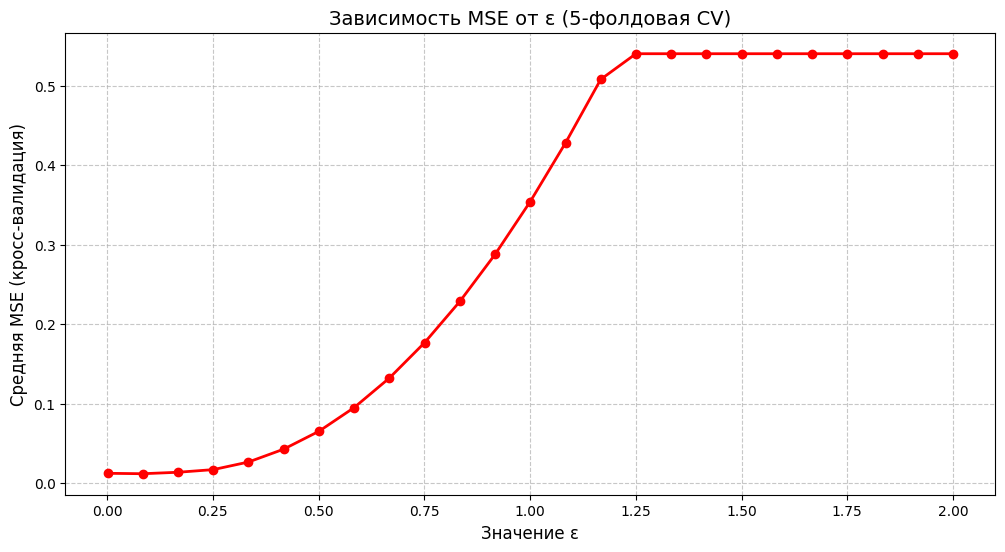

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(epsilons, mse_scores, "r-o", linewidth=2)
plt.xlabel("Значение ε", fontsize=12)
plt.ylabel("Средняя MSE (кросс-валидация)", fontsize=12)
plt.title("Зависимость MSE от ε (5-фолдовая CV)", fontsize=14)
plt.grid(True, ls="--", alpha=0.7)
plt.show()

In [12]:
grid_search.best_params_["svr__epsilon"], -grid_search.best_score_

(np.float64(0.08429166666666667), np.float64(0.01168928618603553))